<a href="https://colab.research.google.com/github/Nahom32/Directed-Models/blob/main/medical_pgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [4]:
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

## Task 1

In [5]:
random_variables = [
    "IsSummer", "HasFlu", "HasFoodPoisoning", "HasHayFever", "HasPneumonia",
    "HasRespiratoryProblems", "HasGastricProblems", "HasRash", "Coughs",
    "IsFatigued", "Vomits", "HasFever"
]
bayes_network = DiscreteBayesianNetwork([
    ("IsSummer", "HasFlu"),
    ("IsSummer", "HasFoodPoisoning"),
    ("IsSummer", "HasHayFever"),
    ("HasFlu", "HasRespiratoryProblems"),
    ("HasHayFever", "HasRespiratoryProblems"),
    ("HasPneumonia", "HasRespiratoryProblems"),
    ("HasFoodPoisoning", "HasGastricProblems"),
    ("HasHayFever", "HasRash"),
    ("HasRespiratoryProblems", "Coughs"),
    ("HasFlu", "IsFatigued"),
    ("HasPneumonia", "IsFatigued"),
    ("HasGastricProblems", "Vomits"),
    ("HasFlu", "HasFever"),
    ("HasPneumonia", "HasFever")
])



In [6]:
def load_dataset(file_path):
  with open(file_path, "r") as file:
    binary_data = []
    for line in file:
      binary_data.append(format(int(line.strip()), "012b"))
    data = [[int(b) for b in row] for row in binary_data]
    return pd.DataFrame(data, columns=random_variables)




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = load_dataset("/content/drive/MyDrive/medical/dataset.dat")
print(df)

         IsSummer  HasFlu  HasFoodPoisoning  HasHayFever  HasPneumonia  \
0               0       0                 0            0             0   
1               0       0                 0            0             1   
2               0       0                 0            0             0   
3               0       0                 0            0             0   
4               0       0                 0            0             1   
...           ...     ...               ...          ...           ...   
3999995         0       0                 0            0             1   
3999996         1       0                 1            1             1   
3999997         0       0                 0            0             0   
3999998         0       0                 0            0             0   
3999999         0       0                 0            0             1   

         HasRespiratoryProblems  HasGastricProblems  HasRash  Coughs  \
0                             0        

## Task 2


In [8]:
bayes_network.fit(df, estimator=MaximumLikelihoodEstimator)
print("\nConditional Probability Table for HasFlu:")
print(bayes_network.get_cpds("HasFlu"))
print(f'\nConditional Probability Table for IsSummer')
print(bayes_network.get_cpds('IsSummer'))
print(bayes_network.check_model())



Conditional Probability Table for HasFlu:
+-----------+---------------------+--------------------+
| IsSummer  | IsSummer(0)         | IsSummer(1)        |
+-----------+---------------------+--------------------+
| HasFlu(0) | 0.9083903219250574  | 0.8029588600104152 |
+-----------+---------------------+--------------------+
| HasFlu(1) | 0.09160967807494252 | 0.1970411399895848 |
+-----------+---------------------+--------------------+

Conditional Probability Table for IsSummer
+-------------+-----------+
| IsSummer(0) | 0.947192  |
+-------------+-----------+
| IsSummer(1) | 0.0528075 |
+-------------+-----------+
True


## Task 3

In [9]:
joint_distribution = {}
with open('/content/drive/MyDrive/medical/joint.dat', 'r') as file:
    for line in file:
        idx,parts = line.strip().split()
        joint_distribution[int(idx)] = float(parts)
print(joint_distribution)



{0: 0.29425875824822, 1: 0.10221620023359, 2: 0.0038311201152, 3: 0.00025540800768, 4: 0.02335386970224, 5: 0.00811239684394, 6: 0.000304057152, 7: 2.02704768e-05, 8: 0.0371538836172, 9: 0.01290608588808, 10: 0.0006385200192, 11: 4.256800128e-05, 12: 0.002948720922, 13: 0.0010242925308, 14: 5.0676192e-05, 15: 3.3784128e-06, 16: 0.0001579014, 17: 5.484996e-05, 18: 6.64848e-07, 19: 4.43232e-08, 20: 1.315845e-05, 21: 4.57083e-06, 22: 5.5404e-08, 23: 3.6936e-09, 24: 2.368521e-05, 25: 8.227494e-06, 26: 8.3106e-09, 27: 5.5404e-10, 28: 1.9737675e-06, 29: 6.856245e-07, 30: 6.9255e-10, 31: 4.617e-11, 32: 0.00036695193696, 33: 0.00012746751494, 34: 0.000315318528, 35: 2.10212352e-05, 36: 2.91231696e-05, 37: 1.011646944e-05, 38: 2.502528e-05, 39: 1.668352e-06, 40: 0.004586899212, 41: 0.0015933439368, 42: 0.000118244448, 43: 7.8829632e-06, 44: 0.00036403962, 45: 0.000126455868, 46: 9.38448e-06, 47: 6.25632e-07, 48: 5.8482e-05, 49: 2.03148e-05, 50: 3.2832e-07, 51: 2.1888e-08, 52: 4.8735e-06, 53: 1.

In [10]:
import numpy as np
P = [joint_distribution[i] for i in range(2**12)]
Q = []

for i in range(2**12):
    assignment_bits = format(i, "012b")
    evidence = {random_variables[j]: int(assignment_bits[j]) for j in range(12)}

    prob = 1.0 # initial probability
    for i in range(len(random_variables)):
        cpd = bayes_network.get_cpds(random_variables[i])
        parent_vals = {}
        for p in cpd.get_evidence():
            parent_vals[p] = evidence[p]
        prob *= cpd.get_value(**{**parent_vals, random_variables[i]: evidence[random_variables[i]]}) ## Query based on names
    Q.append(prob)
epsilon = 1e-15
Q = np.clip(np.array(Q), epsilon, 1.0)
P = np.clip(np.array(P), epsilon, 1.0)
kl_divergence = np.sum(P * np.log(P / Q))
print("KL Divergence:", kl_divergence)

KL Divergence: 0.47170844053766836


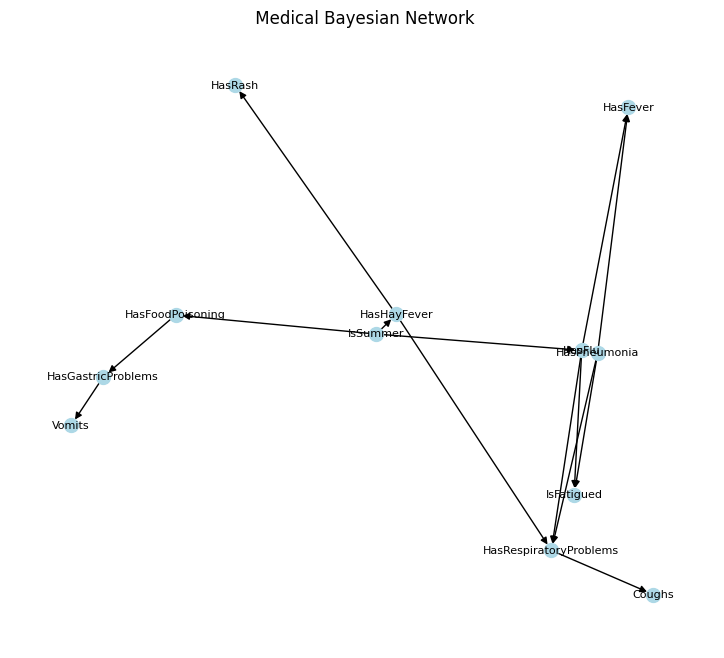

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a networkx DiGraph for Bayesian Network visualization
bn_nx = nx.DiGraph()
bn_nx.add_nodes_from(bayes_network.nodes())
bn_nx.add_edges_from(bayes_network.edges())

plt.figure(figsize=(20, 8))

# Bayesian Network
plt.subplot(1, 2, 1)
nx.draw(bn_nx, with_labels=True, node_size=100, node_color='lightblue', arrows=True, font_size = 8)
plt.title(" Medical Bayesian Network")

plt.show()

## Task 4

In [17]:
from pgmpy.inference import VariableElimination
inference_algorithm = VariableElimination(bayes_network)


### Evidence Based Reasoning

In [24]:
q1 = inference_algorithm.query(
    variables=["HasFlu"],
    evidence={"Coughs": 1, "HasFever": 1}
)
print("P(HasFlu | Coughs=1, HasFever=1):\n", q1)

P(HasFlu | Coughs=1, HasFever=1):
 +-----------+---------------+
| HasFlu    |   phi(HasFlu) |
+===========+===============+
| HasFlu(0) |        0.9027 |
+-----------+---------------+
| HasFlu(1) |        0.0973 |
+-----------+---------------+


In [25]:
evid_query = inference_algorithm.query(
 variables=["HasHayFever"], evidence={"HasRash": 1, "IsSummer": 1}
)
print("P(HasHayFever | HasRash=1, IsSummer=1):\n", evid_query)

P(HasHayFever | HasRash=1, IsSummer=1):
 +----------------+--------------------+
| HasHayFever    |   phi(HasHayFever) |
+================+====================+
| HasHayFever(0) |             0.2173 |
+----------------+--------------------+
| HasHayFever(1) |             0.7827 |
+----------------+--------------------+


### Causal Reasoning

In [19]:
q2 = inference_algorithm.query(
    variables=["HasRash", "Coughs", "IsFatigued", "Vomits", "HasFever"],
    evidence={"HasPneumonia": 1}
)
print("P(Symptoms | HasPneumonia=1):\n", q2)


P(Symptoms | HasPneumonia=1):
 +------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash    | Coughs    | IsFatigued    | Vomits    | HasFever    |   phi(HasRash,Coughs,IsFatigued,Vomits,HasFever) |
+============+===========+===============+===========+=============+==================================================+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(0) | HasFever(0) |                                           0.5082 |
+------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(0) | HasFever(1) |                                           0.1692 |
+------------+-----------+---------------+-----------+-------------+--------------------------------------------------+
| HasRash(0) | Coughs(0) | IsFatigued(0) | Vomits(1) | HasFever(0) |                                           0.0212 |
+--------

In [22]:
inf_query= inference_algorithm.query(
    variables=["Coughs", "HasRash"],
    evidence={"HasFlu": 1, "HasHayFever": 1}
)
print("P(Symptoms | HasFlu=1, HasHayFever=1):\n", inf_query)

P(Symptoms | HasFlu=1, HasHayFever=1):
 +-----------+------------+-----------------------+
| Coughs    | HasRash    |   phi(Coughs,HasRash) |
+===========+============+=======================+
| Coughs(0) | HasRash(0) |                0.7482 |
+-----------+------------+-----------------------+
| Coughs(0) | HasRash(1) |                0.0517 |
+-----------+------------+-----------------------+
| Coughs(1) | HasRash(0) |                0.1872 |
+-----------+------------+-----------------------+
| Coughs(1) | HasRash(1) |                0.0129 |
+-----------+------------+-----------------------+


In [23]:
inf_query2 = inference_algorithm.query(variables=["Coughs", "HasFever"], evidence={"HasRespiratoryProblems": 1})
print("P(Symptoms | HasRespiratoryProblems=1):\n", inf_query2)


P(Symptoms | HasRespiratoryProblems=1):
 +-----------+-------------+------------------------+
| Coughs    | HasFever    |   phi(Coughs,HasFever) |
+===========+=============+========================+
| Coughs(0) | HasFever(0) |                 0.5998 |
+-----------+-------------+------------------------+
| Coughs(0) | HasFever(1) |                 0.2000 |
+-----------+-------------+------------------------+
| Coughs(1) | HasFever(0) |                 0.1501 |
+-----------+-------------+------------------------+
| Coughs(1) | HasFever(1) |                 0.0501 |
+-----------+-------------+------------------------+


### Intercausal Reasoning


In [20]:
q3 = inference_algorithm.query(
    variables=["Vomits"],
    evidence={"IsSummer": 1}
)
print("P(Vomits | IsSummer=1):\n", q3)

P(Vomits | IsSummer=1):
 +-----------+---------------+
| Vomits    |   phi(Vomits) |
+===========+===============+
| Vomits(0) |        0.9533 |
+-----------+---------------+
| Vomits(1) |        0.0467 |
+-----------+---------------+


In [26]:
intercausal_2 = inference_algorithm.query(variables=["HasFoodPoisoning"], evidence={"Vomits": 1, "HasGastricProblems": 1})
print("P(HasFoodPoisoning | Vomits=1, HasGastricProblems=1):\n", intercausal_2)

P(HasFoodPoisoning | Vomits=1, HasGastricProblems=1):
 +---------------------+-------------------------+
| HasFoodPoisoning    |   phi(HasFoodPoisoning) |
+=====================+=========================+
| HasFoodPoisoning(0) |                  0.3599 |
+---------------------+-------------------------+
| HasFoodPoisoning(1) |                  0.6401 |
+---------------------+-------------------------+
